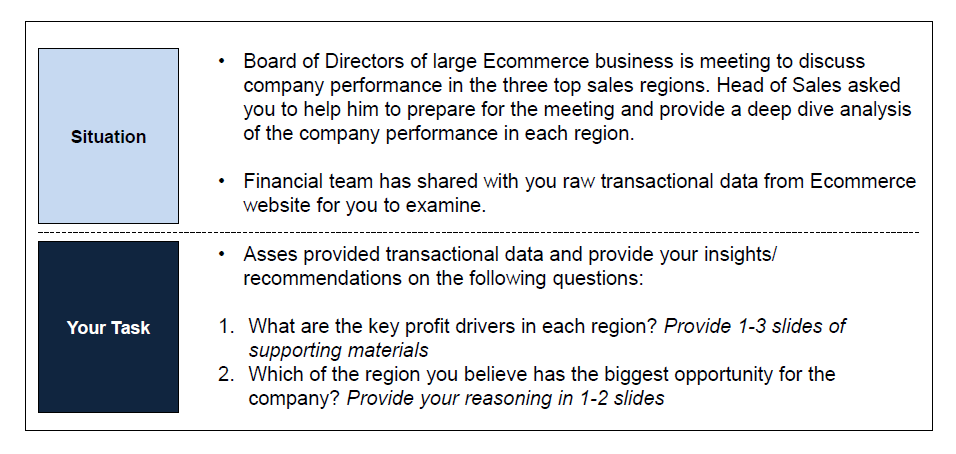

In [1]:
# Import relevand libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Loading data

In [2]:
# Load Excel file
file = 'Homework_raw_data.xlsx'

hw_df = pd.ExcelFile(file)
print(hw_df.sheet_names)

['Definitions', 'Raw_Data', 'ID reference']


In [3]:
# Parse Excel sheets with data
df_raw = hw_df.parse('Raw_Data')
df_ref = hw_df.parse('ID reference', header=1, usecols=[1,2])
print(df_raw.head())
print(df_ref.head())

   ROW  Basket_ID  Product category ID  # of items  REGION ID for shipping  \
0    1     400157                  116           1                       3   
1    2     400157                  118           1                       3   
2    3     400189                  116           1                       3   
3    4     400189                  118           1                       3   
4    5     400251                  113           1                       3   

  Region Name Purchase date  REVENUE  GROSS PROFIT  
0     Techton    2017-06-22     28.9         3.179  
1     Techton    2017-06-22     30.5         3.660  
2     Techton    2016-11-30     30.5         2.745  
3     Techton    2016-11-30     20.9         3.762  
4     Techton    2017-04-09     24.5         7.350  
        Product category   ID
0   Necklaces & earrings  112
1              Bracelets  113
2                Scarves  114
3    Men’s shoes & socks  115
4  Women’s shoes & socks  116


In [4]:
# Merge data tables into one Dataframe
df = pd.merge(df_raw, df_ref, left_on='Product category ID', right_on='ID', how='left')
df.drop(['ID', 'ROW', 'Product category ID'], axis=1, inplace=True)
df.head()

,Basket_ID,# of items,REGION ID for shipping,Region Name,Purchase date,REVENUE,GROSS PROFIT,Product category
0,400157,1,3,Techton,2017-06-22,28.9,3.179,Women’s shoes & socks
1,400157,1,3,Techton,2017-06-22,30.5,3.660,Moisturizers & balms
2,400189,1,3,Techton,2016-11-30,30.5,2.745,Women’s shoes & socks
3,400189,1,3,Techton,2016-11-30,20.9,3.762,Moisturizers & balms
4,400251,1,3,Techton,2017-04-09,24.5,7.350,Bracelets


### 2. Exploring, cleaning, transforming data

In [5]:
# Explore data types and dataframe shape
print(df.dtypes)
print(df.shape)

Basket_ID                          int64
# of items                         int64
REGION ID for shipping             int64
Region Name                       object
Purchase date             datetime64[ns]
REVENUE                          float64
GROSS PROFIT                     float64
Product category                  object
dtype: object
(26631, 8)


In [6]:
# Define function to get gross margin
def get_margin(revenue, gross_profit):
    gm = gross_profit / revenue * 100
    
    return gm

In [7]:
# Define function to get item price
def get_price(revenue, quantity):
    price = revenue / quantity
    return price

In [8]:
# List unique values for Regions and Product categories
regions = df['Region Name'].unique()
product_categories = df['Product category'].unique()

In [9]:
# Add new columns to df
df['Gross margin'] = get_margin(df['REVENUE'], df['GROSS PROFIT'])
df['Unit Price'] = df['REVENUE'] / df['# of items']
df['Costs'] = df['REVENUE'] - df['GROSS PROFIT']
df.head()

,Basket_ID,# of items,REGION ID for shipping,Region Name,Purchase date,REVENUE,GROSS PROFIT,Product category,Gross margin,Unit Price,Costs
0,400157,1,3,Techton,2017-06-22,28.9,3.179,Women’s shoes & socks,11.0,28.9,25.721
1,400157,1,3,Techton,2017-06-22,30.5,3.660,Moisturizers & balms,12.0,30.5,26.840
2,400189,1,3,Techton,2016-11-30,30.5,2.745,Women’s shoes & socks,9.0,30.5,27.755
3,400189,1,3,Techton,2016-11-30,20.9,3.762,Moisturizers & balms,18.0,20.9,17.138
4,400251,1,3,Techton,2017-04-09,24.5,7.350,Bracelets,30.0,24.5,17.150


In [10]:
# Descriptive statistics of df
df.describe(include='all')

,Basket_ID,# of items,REGION ID for shipping,Region Name,Purchase date,REVENUE,GROSS PROFIT,Product category,Gross margin,Unit Price,Costs
count,26631.000000,26631.000000,26631.000000,26631,26631,26631.000000,26631.000000,26631,26631.000000,26631.000000,26631.000000
unique,NaN,NaN,NaN,3,364,NaN,NaN,8,NaN,NaN,NaN
top,NaN,NaN,NaN,Honeyton,2016-11-07 00:00:00,NaN,NaN,Women’s shoes & socks,NaN,NaN,NaN
freq,NaN,NaN,NaN,10255,214,NaN,NaN,7685,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2017-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,405463.717697,1.013518,2.146145,NaN,NaN,19.734524,3.976006,NaN,19.896436,19.630976,15.758518
std,3233.322906,0.149242,0.770445,NaN,NaN,6.995617,2.733137,NaN,10.609096,7.054940,5.946014
min,400000.000000,1.000000,1.000000,NaN,NaN,5.500000,0.275000,NaN,5.000000,1.833333,3.300000
25%,402681.500000,1.000000,2.000000,NaN,NaN,14.500000,2.025000,NaN,12.000000,13.900000,11.000000


In [11]:
# Add Year-Month column to df
df['Year-Month'] = [str(x.year) + '-' + str(x.month) for x in df['Purchase date']]

### 3. Data analysis
#### Visualisation of regional, category sales

  Region Name   REVENUE
0      Oldton  144324.6
1    Honeyton  186605.9
2     Techton  194619.6


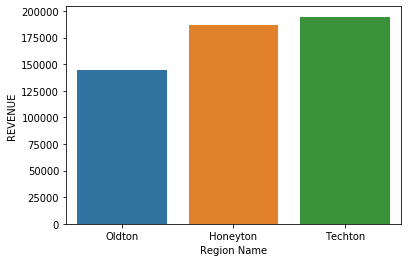

In [12]:
# Plot barchart of revenue by regions 
byreg = df.groupby('Region Name')['REVENUE'].sum().sort_values().reset_index()
print(byreg)

g = sns.barplot(x='Region Name', y='REVENUE', data=byreg, ci=None)
plt.show()

        Product category   REVENUE
0             Men’s care    6266.9
1   Necklaces & earrings   14458.9
2                  Soaps   31765.5
3    Men’s shoes & socks   46386.9
4              Bracelets   69586.4
5   Moisturizers & balms  101774.4
6                Scarves  102362.2
7  Women’s shoes & socks  152948.9


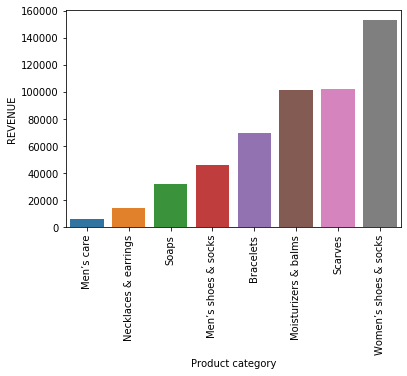

In [13]:
# Plot barchart of revenue by product categories 
bycat = df.groupby('Product category')['REVENUE'].sum().sort_values().reset_index()
print(bycat)

g = sns.barplot(x='Product category', y='REVENUE', data=bycat, ci=None)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

#### Visualisation of gross profit, gross margin sales in regions by category

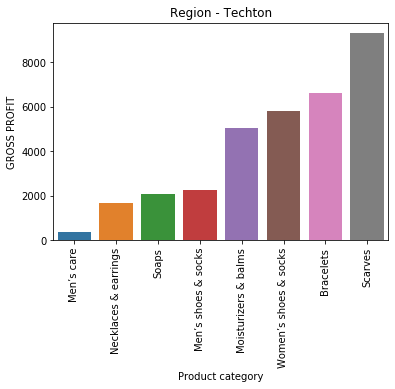

        Product category  GROSS PROFIT
0                Scarves      9303.547
1              Bracelets      6627.797
2  Women’s shoes & socks      5809.640
3   Moisturizers & balms      5034.878
4    Men’s shoes & socks      2275.603
5                  Soaps      2087.626
6   Necklaces & earrings      1688.387
7             Men’s care       375.401


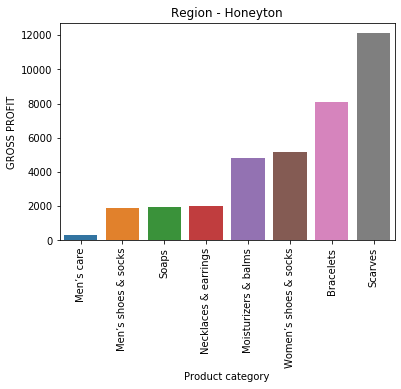

        Product category  GROSS PROFIT
0                Scarves     12100.955
1              Bracelets      8100.475
2  Women’s shoes & socks      5178.181
3   Moisturizers & balms      4815.053
4   Necklaces & earrings      2033.063
5                  Soaps      1935.731
6    Men’s shoes & socks      1898.120
7             Men’s care       343.149


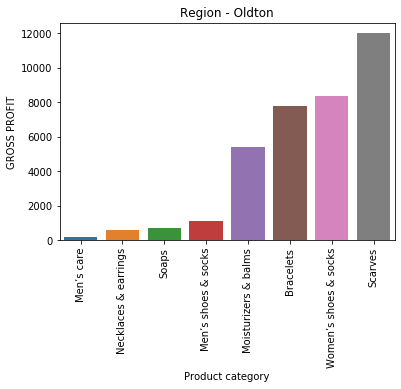

        Product category  GROSS PROFIT
0                Scarves     12002.359
1  Women’s shoes & socks      8350.046
2              Bracelets      7789.903
3   Moisturizers & balms      5412.792
4    Men’s shoes & socks      1154.518
5                  Soaps       717.593
6   Necklaces & earrings       625.810
7             Men’s care       224.379


In [14]:
# Plot Gross profit by product categories in regions
for reg in regions:
    gp_bycat = df[df['Region Name'] == reg].groupby('Product category')['GROSS PROFIT'].sum().sort_values().reset_index()
    g = sns.barplot(x='Product category', y='GROSS PROFIT', data=gp_bycat)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set_title('Region - ' + reg)
    plt.show()
    print(gp_bycat.sort_values('GROSS PROFIT', ascending=False).reset_index(drop=True))

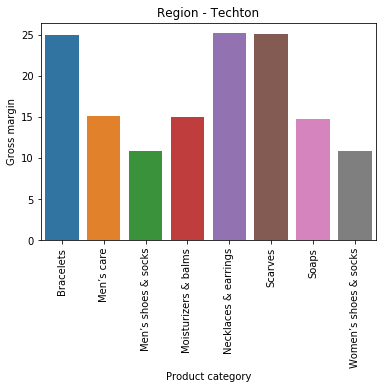

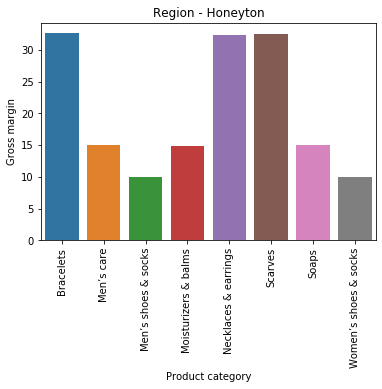

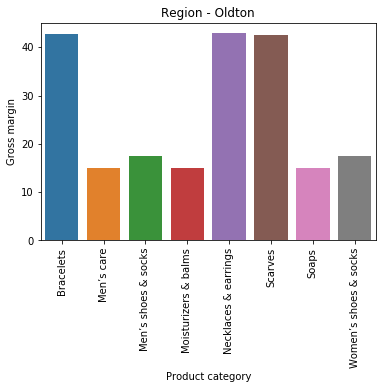

In [15]:
# Plot Gross margin by product categories in regions
for reg in regions:
    gp_bycat = df[df['Region Name'] == reg].groupby('Product category')['GROSS PROFIT','REVENUE'].sum().reset_index()
    gp_bycat['Gross margin'] = get_margin(gp_bycat['REVENUE'], gp_bycat['GROSS PROFIT'])
    g = sns.barplot(x='Product category', y='Gross margin', data=gp_bycat)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set_title('Region - ' + reg)
    plt.show()

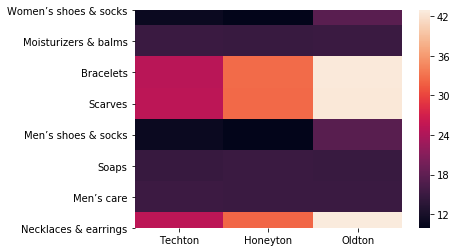

In [16]:
# Plot heatmap of product margins in regions
margins = {}

for pc in product_categories:
    margin_reg = []
    for reg in regions:        
        margin = get_margin(df[(df['Region Name']==reg)&(df['Product category']==pc)]['REVENUE'].sum(),\
                           df[(df['Region Name']==reg)&(df['Product category']==pc)]['GROSS PROFIT'].sum())
        margin_reg.append(margin)
    margins[pc] = margin_reg
    
margin_df = pd.DataFrame.from_dict(margins, orient='index', columns=regions)
sns.heatmap(margin_df)
plt.show()

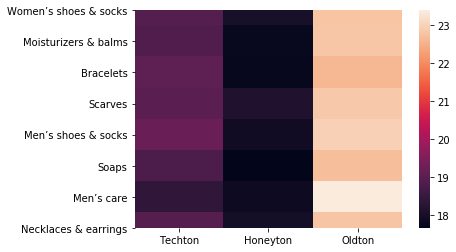

In [17]:
# Plot heatmap of product prices in regions
prices = {}

for pc in product_categories:
    price_reg = []
    for reg in regions:        
        price = get_price(df[(df['Region Name']==reg)&(df['Product category']==pc)]['REVENUE'].sum(),\
                           df[(df['Region Name']==reg)&(df['Product category']==pc)]['# of items'].sum())
        price_reg.append(price)
    prices[pc] = price_reg
    
price_df = pd.DataFrame.from_dict(prices, orient='index', columns=regions)
sns.heatmap(price_df)
plt.show()

In [18]:
# Calculate difference between margins in Oldton and avg. margin in other regions
oldton_gm_diff = margin_df['Oldton'] - (margin_df['Techton']+margin_df['Honeyton'])/2
oldton_gm_diff

Women’s shoes & socks     7.137949
Moisturizers & balms      0.083769
Bracelets                13.931848
Scarves                  13.684662
Men’s shoes & socks       7.037922
Soaps                    -0.023108
Men’s care               -0.070704
Necklaces & earrings     14.145685
dtype: float64

Noticeably higher gross profit margin in Oldton region in almost all product categories. The higher margins are due to higher overall prices in the region. Price reduction of ~7% (Men/Women Shoes&Socks) and -14% (Bracelets, scarves, Necklaces&Earrings) may be implemented in Oldton region. 

In [19]:
# Generate sales tree dataframe by regions, product categories
df_by_region = df.groupby(['Region Name', 'Product category'])['REVENUE', 'GROSS PROFIT', '# of items'].sum().reset_index()
df_by_region['Gross margin'] = get_margin(df_by_region['REVENUE'], df_by_region['GROSS PROFIT'])
df_by_region['Avg. price'] = get_price(df_by_region['REVENUE'], df_by_region['# of items']) 
df_by_region.sort_values(['Region Name', 'Gross margin'], ascending=False, inplace=True)

df_by_region.reset_index(inplace=True)

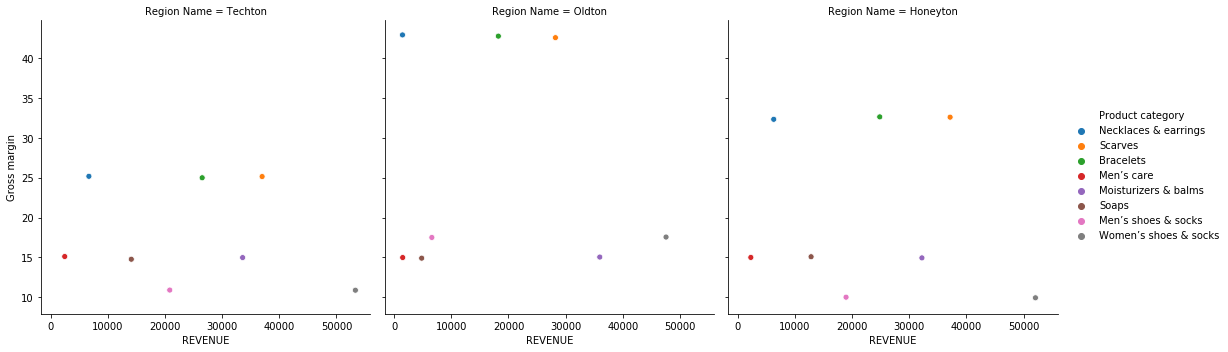

In [20]:
# Plot product categories revenue and gross margin scatterplot by regions
sns.relplot(x='REVENUE' , y='Gross margin',
                 col='Region Name', hue='Product category',
                 kind='scatter', data=df_by_region)

plt.show()

In [21]:
# Product categories revenue by regions
df_by_region.reset_index()\
    .pivot(index='Region Name', columns='Product category', values='REVENUE')#['Necklaces & earrings', 'Scarves', 'Bracelets']

Product category,Bracelets,Men’s care,Men’s shoes & socks,Moisturizers & balms,Necklaces & earrings,Scarves,Soaps,Women’s shoes & socks
Region Name,,,,,,,,
Honeyton,24834.4,2287.0,18942.5,32210.8,6291.8,37143.7,12826.7,52069.0
Oldton,18228.4,1496.8,6595.2,35964.1,1459.2,28211.6,4812.3,47557.0
Techton,26523.6,2483.1,20849.2,33599.5,6707.9,37006.9,14126.5,53322.9


#### Sales tree analysis

In [22]:
cust_yearly = []

for reg in regions:
    for pc in product_categories:
        customers = len(df[(df['Region Name'] == reg)&(df['Product category'] == pc)]['Basket_ID'].unique())
        revenue = df[(df['Region Name'] == reg)&(df['Product category'] == pc)]['REVENUE'].sum()
        items = df[(df['Region Name'] == reg)&(df['Product category'] == pc)]['# of items'].sum()
        cust_yearly.append([reg, pc, customers, revenue, items])

df_cust_yearly = pd.DataFrame(cust_yearly, columns=['Region Name','Product category', 'Customers', 'REVENUE', '# of items'])
df_cust_yearly.head()

,Region Name,Product category,Customers,REVENUE,# of items
0,Techton,Women’s shoes & socks,2785,53322.9,2817
1,Techton,Moisturizers & balms,1757,33599.5,1781
2,Techton,Bracelets,1374,26523.6,1391
3,Techton,Scarves,1923,37006.9,1946
4,Techton,Men’s shoes & socks,1072,20849.2,1085


In [23]:
# Compose sales tree dataframe by regions
reg_salestree=pd.DataFrame(df_cust_yearly.groupby('Region Name')['Customers','REVENUE', '# of items'].sum())
reg_salestree['Avg. Ticket'] = reg_salestree['REVENUE']/reg_salestree['Customers']
reg_salestree['Avg. no of items'] = reg_salestree['# of items']/reg_salestree['Customers']
reg_salestree['Avg. item price'] = reg_salestree['REVENUE']/reg_salestree['# of items']
reg_salestree

,Customers,REVENUE,# of items,Avg. Ticket,Avg. no of items,Avg. item price
Region Name,,,,,,
Honeyton,10255,186605.9,10401,18.196577,1.014237,17.941150
Oldton,6242,144324.6,6330,23.121532,1.014098,22.800095
Techton,10134,194619.6,10260,19.204618,1.012433,18.968772


In [24]:
# Sales tree dataframe by Year-month
byreg_monthly = df.groupby(['Region Name', 'Year-Month'])['REVENUE','Basket_ID', '# of items']\
                    .agg({'REVENUE':np.sum, 'Basket_ID':lambda x: x.nunique(), '# of items':np.sum}).reset_index()
byreg_monthly.rename(columns={'Basket_ID':'Customers', 'REVENUE':'Revenue'}, inplace=True)
byreg_monthly['Avg. Ticket'] = byreg_monthly['Revenue']/byreg_monthly['Customers']
byreg_monthly['Avg. no of Items'] = byreg_monthly['# of items']/byreg_monthly['Customers']
byreg_monthly['Avg. item price'] = byreg_monthly['Revenue']/byreg_monthly['# of items']
byreg_monthly.head()

,Region Name,Year-Month,Revenue,Customers,# of items,Avg. Ticket,Avg. no of Items,Avg. item price
0,Honeyton,2016-10,24093.5,447,1378,53.900447,3.082774,17.484398
1,Honeyton,2016-11,37970.7,715,2168,53.105874,3.032168,17.514161
2,Honeyton,2016-12,14793.4,283,812,52.273498,2.869258,18.218473
3,Honeyton,2017-1,12613.2,237,684,53.220253,2.886076,18.440351
4,Honeyton,2017-2,10363.8,194,574,53.421649,2.958763,18.055401


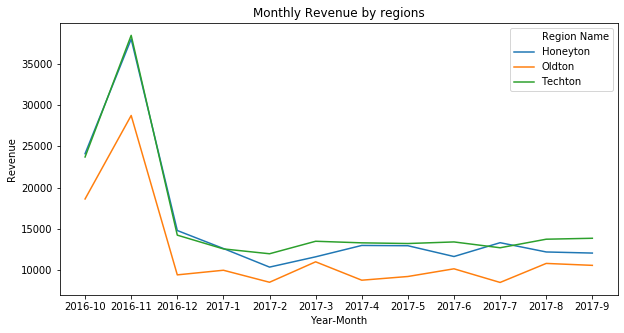

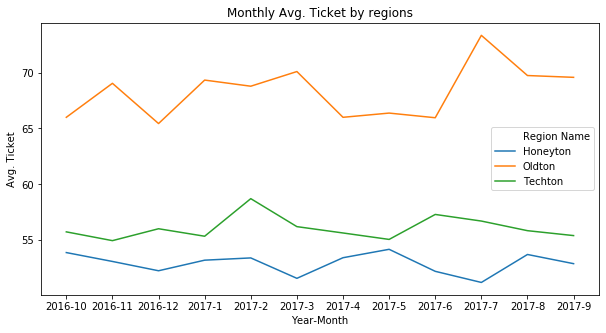

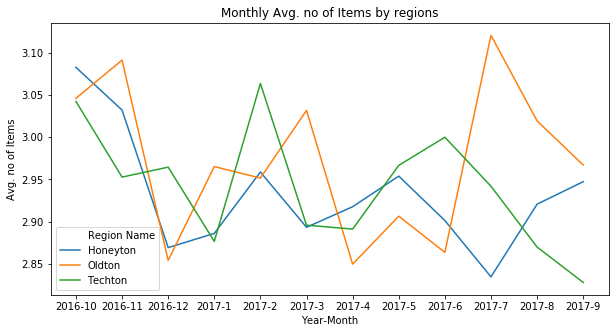

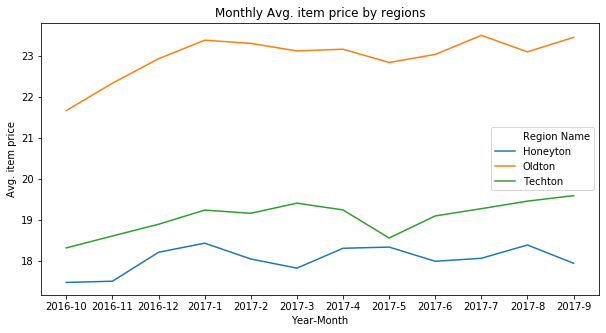

In [25]:
# plot Sales tree components trends by regions
for col in ['Revenue', 'Avg. Ticket', 'Avg. no of Items','Avg. item price']:
    plt.figure(figsize=(10,5))
    g = sns.lineplot(x='Year-Month', y=col, data=byreg_monthly, hue='Region Name')
    g.set_title('Monthly ' + col + ' by regions')
    plt.show()

Steady trends are identified sales tree KPIs trends in regions. Avg. price trend in Oldton region is to be focused on - pricing strategy in above mentioned product categories should be implemented.